## Imports and creds

In [2]:
from google.cloud import bigquery
from google.oauth2 import service_account
import pandas as pd

In [3]:
%load_ext rpy2.ipython

In [4]:
%%R
library(tidyverse)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [57]:
%%R
library(extrafont)


Attaching package: ‘extrafont’



    font_install




In [72]:
%%R
font_add_google("Didact Gothic", "dg")
font_add_google("IBM Plex Sans KR", "ibm")

In [79]:
%%R
font_add_google("Mulish", "mul")

In [101]:
%%R
font_add_google("Inter", "int")

NULL


In [106]:
%%R

theme_light_beige <- theme(plot.background = element_rect(fill = "#F0F1EA", color = "transparent"),
      panel.background = element_rect(fill = "#F0F1EA", color = "transparent"),
      plot.margin = margin(t = "1.5", r = "1.5", b = "1.5", l = "1.5", unit = "in"),
      panel.grid = element_blank(),
      plot.title = element_text(size = 30, color = "#343A41", family = "int", face = "bold"),
      axis.text = element_text(size = 15, color = "#343A41", family = "int"),
      axis.title = element_text(size = 19, color = "#343A41", family = "int"),
      axis.ticks = element_blank(),
      legend.background = element_blank(),
      legend.position = "bottom",
      legend.title = element_text(color = "#343A41", family = "int"),
      legend.text = element_text(color = "#343A41", family = "int"))

In [58]:
%ls

drive/  sample_data/


In [5]:
# Mount drive - needed for GBQ creds
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
root_path = '/content/drive/MyDrive/GitHub'

In [127]:
credentials = service_account.Credentials.from_service_account_file(
    f'{root_path}/grav-waves/grav-waves-358320-34ebfeae2689.json', scopes=["https://www.googleapis.com/auth/cloud-platform"],
)

client = bigquery.Client(credentials=credentials, project=credentials.project_id,)

## Query data

In [118]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [129]:
from google.colab import syntax

How many versions of each event do we have?

In [147]:
%%bigquery --project grav-waves-358320

SELECT commonName, COUNT(*) AS n_versions
FROM mergers.features
GROUP BY commonName
HAVING n_versions > 1
ORDER BY n_versions DESC;

,commonName,n_versions
0,GW190412,4
1,GW190521,4
2,GW190425,3
3,GW190814,3
4,GW150914,3
5,GW151012,3
6,GW170608,3
7,GW170814,3
8,GW170817,3
9,GW190408_181802,2


What differs among versions, and which is the most reliable? My assumption would be that the latest version is the most reliable. Let's take a look at an event with multiple versions to see if there's any info to contradict that guess.

In [140]:
%%bigquery --project grav-waves-358320

SELECT *
FROM mergers.features
WHERE commonName = 'GW190412'
ORDER BY version;

,id,commonName,version,catalog_shortName,GPS,reference,jsonurl,mass_1_source,mass_1_source_lower,mass_1_source_upper,...,far,far_lower,far_upper,p_astro,p_astro_lower,p_astro_upper,final_mass_source,final_mass_source_lower,final_mass_source_upper,merger_datetime
0,GW190412-v1,GW190412,1,O3_Discovery_Papers,1.239082e+09,/o3_eventdata_docs,https://www.gw-openscience.org/eventapi/json/O...,NaN,NaN,NaN,...,NaN,None,None,NaN,None,None,NaN,NaN,NaN,2019-04-12
1,GW190412-v2,GW190412,2,O3_Discovery_Papers,1.239082e+09,/o3_eventdata_docs/,https://www.gw-openscience.org/eventapi/json/O...,30.1,-5.3,4.6,...,NaN,None,None,NaN,None,None,NaN,NaN,NaN,2019-04-12
2,GW190412-v3,GW190412,3,GWTC-2,1.239082e+09,/GWTC-2/,https://www.gw-openscience.org/eventapi/json/G...,30.1,-5.1,4.7,...,0.00001,None,None,1.0,None,None,37.3,-3.8,3.9,2019-04-12
3,GW190412_053044-v4,GW190412,4,GWTC-2.1-confident,1.239082e+09,/GWTC-2.1/,https://www.gw-openscience.org/eventapi/json/G...,27.7,-6.0,6.0,...,0.00001,None,None,1.0,None,None,35.6,-4.5,4.8,2019-04-12


In [162]:
%%bigquery --project grav-waves-358320 gw

WITH max_version AS (SELECT commonName, MAX(version) AS max_version,
                    FROM mergers.features
                    WHERE mass_1_source IS NOT NULL AND mass_2_source IS NOT NULL
                    GROUP BY commonName)

SELECT a.commonName, a.GPS, a.mass_1_source, a.mass_2_source, a.final_mass_source, a.merger_datetime
FROM mergers.features a

INNER JOIN max_version b
ON a.commonName = b.commonName
AND a.version = b.max_version

WHERE a.merger_datetime > '2010-01-01'; --get rid of blind injection row

In [8]:
# Another way to pull in data; I prefer to use a SQL code chunk
# features_q = syntax.sql('''SELECT 
#                           * FROM `grav-waves-358320.mergers.features`;''')
# gw = client.query(features_q).to_dataframe()

In [163]:
gw.head(5)

,commonName,GPS,mass_1_source,mass_2_source,final_mass_source,merger_datetime
0,GW190424_180648,1.240164e+09,40.5,31.8,68.9,2019-04-24 18:06:48
1,GW190426_152155,1.240327e+09,5.7,1.5,NaN,2019-04-26 15:21:55
2,GW190909_114149,1.252065e+09,45.8,28.3,72.0,2019-09-09 11:41:49
3,GW150914,1.126259e+09,35.6,30.6,63.1,2015-09-14 00:00:00
4,GW151012,1.128679e+09,23.2,13.6,35.6,2015-10-12 00:00:00


In [64]:
%%R
loadfonts(device = "win")

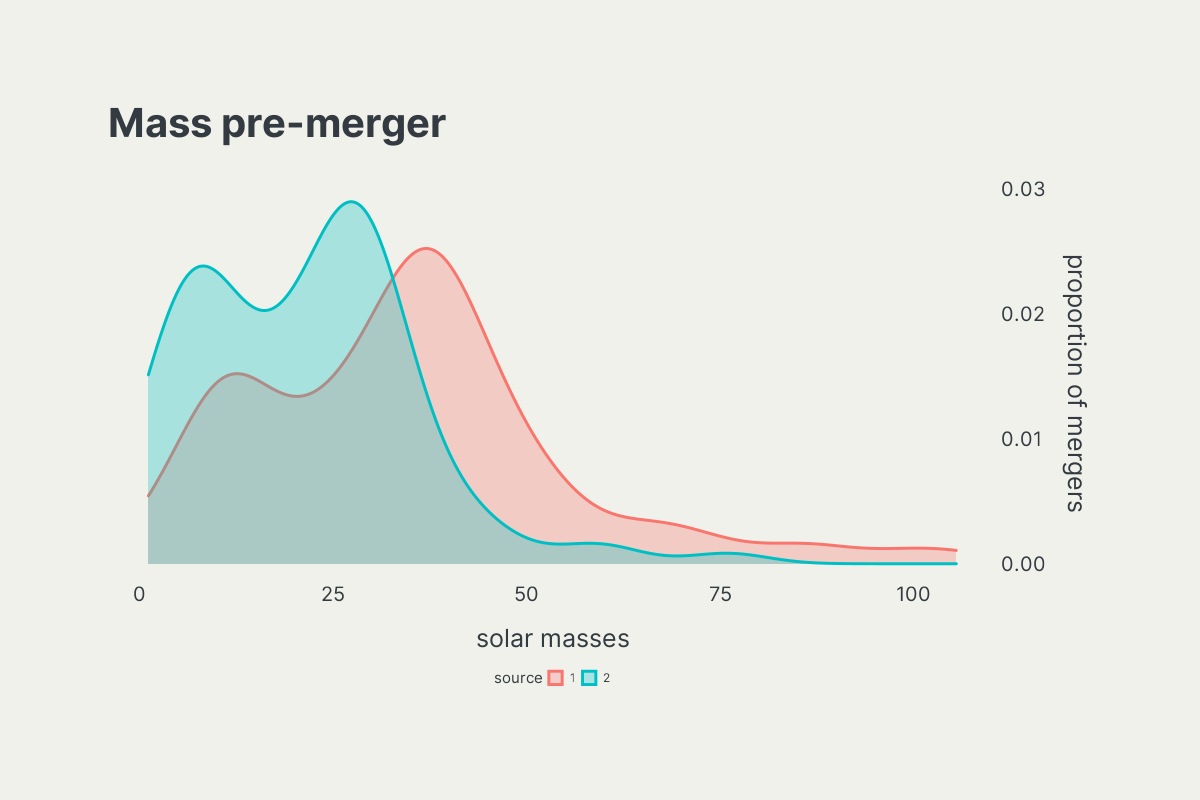

In [164]:
%%R -i gw -h 800 -w 1200

showtext_auto()

gw %>%
select(commonName, mass_1_source, mass_2_source) %>%
gather(mass_1_source, mass_2_source, key = "source", value = "mass") %>%
mutate(source = ifelse(source == "mass_1_source", "1", "2")) %>% 
 ggplot(aes(mass, fill = source, color = source)) +
# geom_density(fill = "#343A41", color = "#343A41", alpha = 0.3, size = 1.4) +
geom_density(alpha = 0.3, size = 1.4) +
labs(title = "Mass pre-merger\n",
     x = "\nsolar masses",
     y = "proportion of mergers\n") +
scale_y_continuous(position = "right") +
theme_light_beige

In [110]:
%%R
library(lubridate)

Attaching package: ‘lubridate’



    date, intersect, setdiff, union




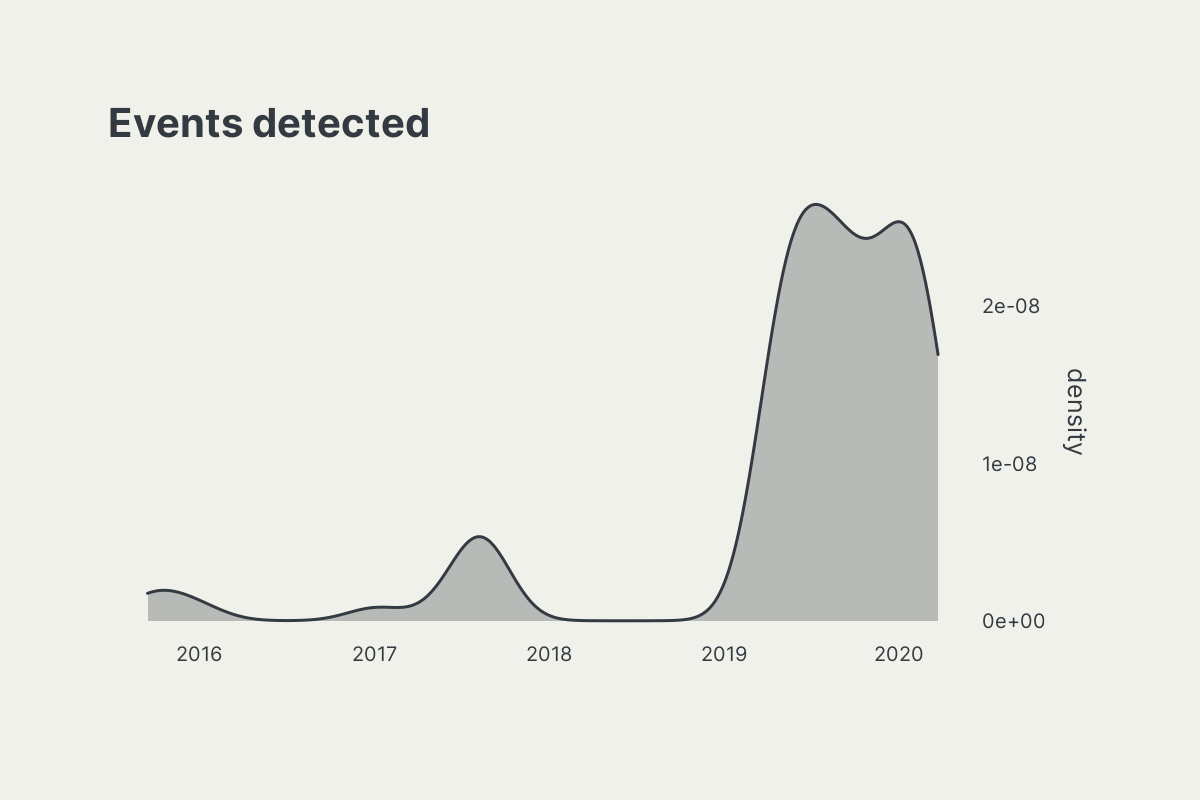

In [165]:
%%R -h 800 -w 1200

showtext_auto()

gw %>%
 ggplot(aes(merger_datetime)) +
geom_density(fill = "#343A41", color = "#343A41", alpha = 0.3, size = 1.4) +
# geom_density(alpha = 0.3, size = 1.4) +
labs(title = "Events detected\n",
     x = "",
     y = "density\n") +
scale_y_continuous(position = "right") +
theme_light_beige


Each separate observation run is quite clear.

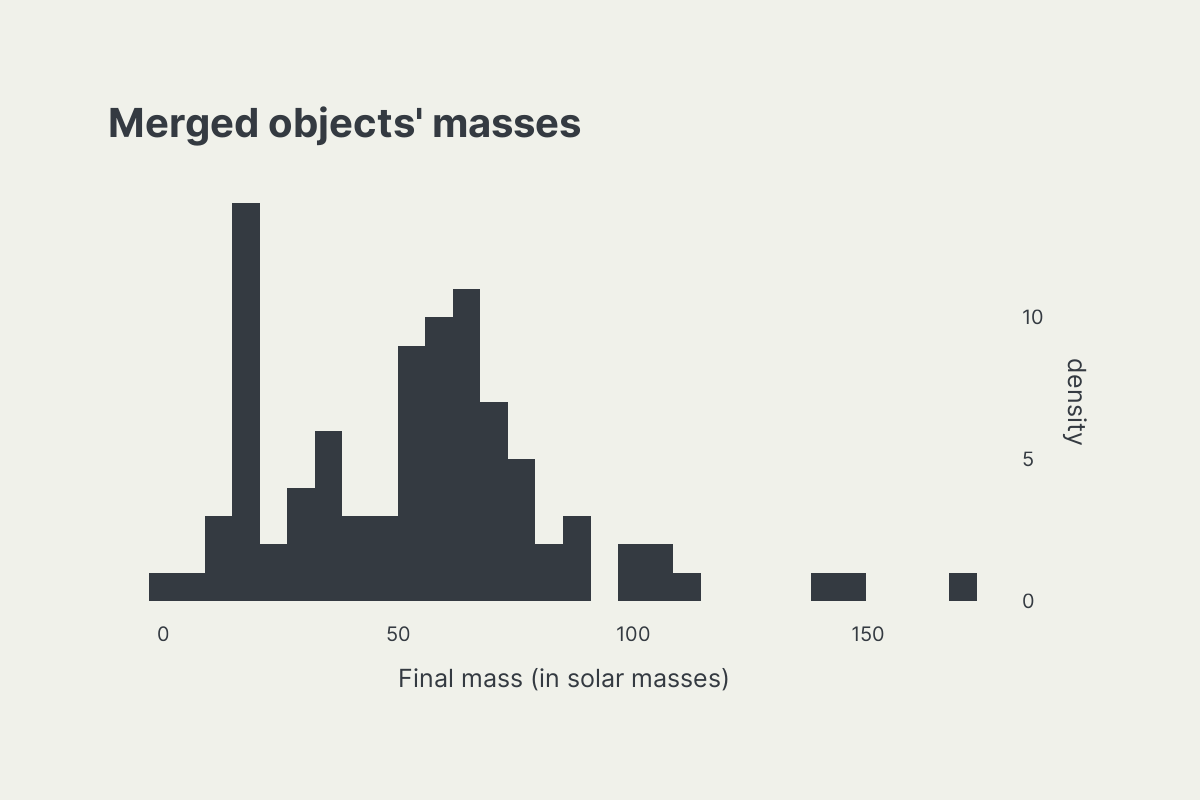

In [170]:
%%R -h 800 -w 1200
gw %>%
 ggplot(aes(final_mass_source)) +
geom_histogram(fill = "#343A41", size = 1.4) +
# geom_density(alpha = 0.3, size = 1.4) +
labs(title = "Merged objects' masses\n",
     x = "\nFinal mass (in solar masses)",
     y = "density\n") +
scale_y_continuous(position = "right") +
theme_light_beige